In [188]:
import matplotlib.pyplot as plt

In [189]:
# PARSE TRIAL DATA

filenames = ['trials/trialH1.txt', 'trials/trialH2.txt', 'trials/trialH3.txt']

best_train_acc = []
best_tune_acc = []
best_test_acc = []
best = 1

# for filename in filenames:
    
with open(filenames[0], 'r') as datafile:

    train_idx = 0
    tune_idx = 0
    test_id = 0
    train_acc = []
    tune_acc = []
    test_acc = []

    for line in datafile:

        if line.startswith("\n") or line.startswith("\t"):
            continue

        line_l = line.split()
        if line_l[1] == 'TRAIN':
            train_acc.append((line_l[4].replace(":", ""), float(line_l[5])))
            #train_acc.append(float(line_l[5]))
            train_idx +=1
        elif line_l[1] == 'TUNE':
            tune_acc.append((line_l[4].replace(":", ""), float(line_l[5])))
            #tune_acc.append(float(line_l[5]))
            tune_idx +=1
        elif line_l[1] == 'TEST':
            test_acc.append((line_l[4].replace(":", ""), float(line_l[5])))
            #test_acc.append(float(line_l[5]))
            test_idx +=1

        if line_l[0] == 'Error':
            if float(line_l[2]) < best:
                best = float(line_l[2])
                best_train_acc = list(train_acc)
                best_tune_acc = list(tune_acc)
                best_test_acc = list(test_acc)
            train_acc.clear()
            tune_acc.clear()
            test_acc.clear()
            train_idx = 0
            tune_idx = 0
            test_idx = 0

# print(best_test_acc)
# print()
# print(best_train_acc)
# print()
# print(best_tune_acc)


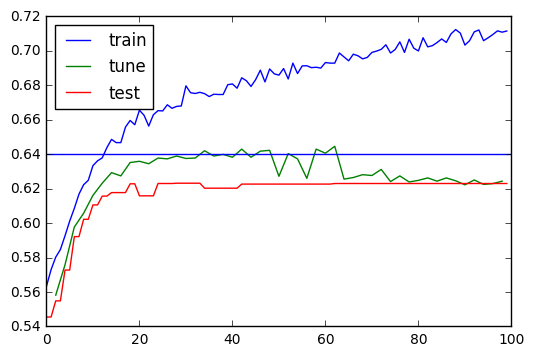

In [190]:
## GRAPH ##

xs = [x[0] for x in best_train_acc]
ys = [x[1] for x in best_train_acc]
train, = plt.plot(xs, ys)
train.set_label('train')
xs = [x[0] for x in best_tune_acc]
ys = [x[1] for x in best_tune_acc]
tune, = plt.plot(xs, ys)
tune.set_label('tune')
xs = [x[0] for x in best_test_acc]
ys = [x[1] for x in best_test_acc]
test, = plt.plot(xs, ys)
test.set_label('test')
plt.legend(loc = 2)
plt.axhline(y=.64)
plt.show()

plt.savefig('../early_stopping.png')